In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.awa_interface import AWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

env = AWAEnvironment(variable_file, observable_file, interface=AWAInterface(), target_charge=1.0)

In [2]:
meas = env.get_screen_measurement("13ARV1",["AWAVXI11ICT:Ch1"])

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 16:32:44.380250846
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 16:32:44.380375678
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 16:32:44.380443903
................................................................

In [3]:
meas

{'13ARV1:image1:ArraySize0_RBV': 1920,
 'AWAVXI11ICT:Ch1': 9.742647359091987e-10,
 '13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:Cx': 394.441233256105,
 '13ARV1:Cy': 330.2722963436393,
 '13ARV1:Sx': 96.10540018421649,
 '13ARV1:Sy': 21.184659066483853,
 '13ARV1:bb_penalty': -4.286976047974406,
 '13ARV1:total_intensity': 300408,
 '13ARV1:log10_total_intensity': 5.477711493943293}

In [4]:
meas = env.get_observables(["13ARV1:Sx"])

In [5]:
meas

{'13ARV1:image1:ArraySize0_RBV': 1920.0,
 'AWAVXI11ICT:Ch1': 9.397996360199905e-10,
 '13ARV1:image1:ArraySize1_RBV': 1200.0,
 '13ARV1:Cx': 389.2477250931062,
 '13ARV1:Cy': 328.24794435803165,
 '13ARV1:Sx': 96.82925943875624,
 '13ARV1:Sy': 21.168014371422622,
 '13ARV1:bb_penalty': -8.420090171664526,
 '13ARV1:total_intensity': 301732.8,
 '13ARV1:log10_total_intensity': 5.478731613181067,
 '13ARV1:image1:ArraySize0_RBV_std': 0.0,
 'AWAVXI11ICT:Ch1_std': 2.766327947605867e-11,
 '13ARV1:image1:ArraySize1_RBV_std': 0.0,
 '13ARV1:Cx_std': 5.041924435554617,
 '13ARV1:Cy_std': 1.2558454312845817,
 '13ARV1:Sx_std': 2.2844560315939164,
 '13ARV1:Sy_std': 0.5355484542468444,
 '13ARV1:bb_penalty_std': 3.553304588131177,
 '13ARV1:total_intensity_std': 21898.94348364779,
 '13ARV1:log10_total_intensity_std': 0.0308973572178913}

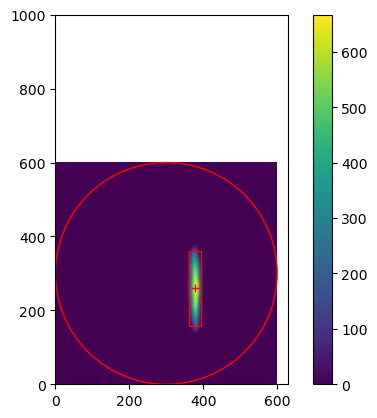

In [6]:
meas = env.get_screen_measurement("13ARV1",['13ARV1:Sx', 'AWAVXI11ICT:Ch1'], visualize=True)

In [7]:
meas

{'AWAVXI11ICT:Ch1': 9.062254321297676e-10,
 '13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:Sx': 7.977455320729995,
 '13ARV1:image1:ArraySize0_RBV': 1920,
 '13ARV1:Cx': 378.445480058594,
 '13ARV1:Cy': 259.6131163394851,
 '13ARV1:Sy': 50.495397069654146,
 '13ARV1:bb_penalty': -130.00270136148202,
 '13ARV1:total_intensity': 2109430,
 '13ARV1:log10_total_intensity': 6.324165118189984}